<a href="https://colab.research.google.com/github/vmacf/redes_neurais/blob/master/SOM/Self_Organising_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/vmacf/redes_neurais.git

# Self-Organising Maps Netowork

Segue um código exemplo da rede neural SOM

Para maiores detalhes ver site:
http://blog.yhat.com/posts/self-organizing-maps-2.html

In [0]:
from __future__ import division

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches

%matplotlib inline

Configuração da SOM

Escolhe:
1. Tamanho do mapa da SOM: X e Y
2. Número de iterações
3. Taxa de aprendizado
4. Tipo de normalização dos dados


In [0]:
X = 5
Y = 5
network_dimensions = np.array([X, Y])
n_iterations = 10000
init_learning_rate = 0.1

normalise_data = True

# if True, assume all data on common scale
# if False, normalise to [0 1] range along each column
normalise_by_column = False

Cria base com dados aleatórios em 3 classes

In [0]:
# 8 colours as initial test set
#raw_data = np.array([[1, 0, 0], [0, 1, 0],
#                     [0, 0.5, 0.25], [0, 0, 1],
#                     [0, 0, 0.5], [1, 1, 0.2],
#                     [1, 0.4, 0.25], [1, 0, 1]]).T * 255
# or use random colours
raw_data = np.random.randint(0, 255, (3, 100))

# establish variables based on data
m = raw_data.shape[0]
n = raw_data.shape[1]

data = raw_data
# check if data needs to be normalised
if normalise_data:
    if normalise_by_column:
        # normalise along each column
        col_maxes = raw_data.max(axis=0)
        data = raw_data / col_maxes[np.newaxis, :]
    else:
        # normalise entire dataset
        data = raw_data / data.max()


In [0]:
#cria raio inicial de acordo com o tamanho inicial do mapa da SOM
init_radius = max(network_dimensions[0], network_dimensions[1]) / 2
# radius decay parameter
time_constant = n_iterations / np.log(init_radius)

# weight matrix needs to be one m-dimensional vector for each neuron in the SOM
net = np.random.random((network_dimensions[0], network_dimensions[1], m))



Rede Neural SOM

In [0]:
def find_bmu(t, net, m):
    """
        Find the best matching unit for a given vector, t, in the SOM
        Returns: a (bmu, bmu_idx) tuple where bmu is the high-dimensional BMU
                 and bmu_idx is the index of this vector in the SOM
    """
    bmu_idx = np.array([0, 0])
    # set the initial minimum distance to a huge number
    min_dist = np.iinfo(np.int).max    
    # calculate the high-dimensional distance between each neuron and the input
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            # don't bother with actual Euclidean distance, to avoid expensive sqrt operation
            sq_dist = np.sum((w - t) ** 2)
            if sq_dist < min_dist:
                min_dist = sq_dist
                bmu_idx = np.array([x, y])
    # get vector corresponding to bmu_idx
    bmu = net[bmu_idx[0], bmu_idx[1], :].reshape(m, 1)
    # return the (bmu, bmu_idx) tuple
    return (bmu, bmu_idx)

In [0]:
def decay_radius(initial_radius, i, time_constant):
    return initial_radius * np.exp(-i / time_constant)

In [0]:
def decay_learning_rate(initial_learning_rate, i, n_iterations):
    return initial_learning_rate * np.exp(-i / n_iterations)

In [0]:
def calculate_influence(distance, radius):
    return np.exp(-distance / (2* (radius**2)))

Aprendizado SOM

In [0]:
for i in range(n_iterations):
    #print('Iteration %d' % i)
    
    # select a training example at random
    t = data[:, np.random.randint(0, n)].reshape(np.array([m, 1]))
    
    # find its Best Matching Unit
    bmu, bmu_idx = find_bmu(t, net, m)
    
    # decay the SOM parameters
    r = decay_radius(init_radius, i, time_constant)
    l = decay_learning_rate(init_learning_rate, i, n_iterations)
    
    # now we know the BMU, update its weight vector to move closer to input
    # and move its neighbours in 2-D space closer
    # by a factor proportional to their 2-D distance from the BMU
    for x in range(net.shape[0]):
        for y in range(net.shape[1]):
            w = net[x, y, :].reshape(m, 1)
            # get the 2-D distance (again, not the actual Euclidean distance)
            w_dist = np.sum((np.array([x, y]) - bmu_idx) ** 2)
            # if the distance is within the current neighbourhood radius
            if w_dist <= r**2:
                # calculate the degree of influence (based on the 2-D distance)
                influence = calculate_influence(w_dist, r)
                # now update the neuron's weight using the formula:
                # new w = old w + (learning rate * influence * delta)
                # where delta = input vector (t) - old w
                new_w = w + (l * influence * (t - w))
                # commit the new weight
                net[x, y, :] = new_w.reshape(1, 3)

Visualiza o mapa criado

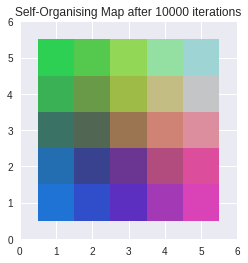

In [0]:
fig = plt.figure()
# setup axes
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim((0, net.shape[0]+1))
ax.set_ylim((0, net.shape[1]+1))
ax.set_title('Self-Organising Map after %d iterations' % n_iterations)

# plot the rectangles
for x in range(1, net.shape[0] + 1):
    for y in range(1, net.shape[1] + 1):
        ax.add_patch(patches.Rectangle((x-0.5, y-0.5), 1, 1,
                     facecolor=net[x-1,y-1,:],
                     edgecolor='none'))
plt.show()

#EXEMPLO COM BIBLIOTECA SOMCLU

Essa biblioteca suporta uso de GPUs e possui implementação super simples

In [0]:
!pip install somoclu
!pip install ipython ipdb

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
import ipdb
%matplotlib inline


Exemplo com a base de dados Iris

/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/art3d.py:733: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.6/dist-packages/mpl_toolkits/mplot3d/art3d.py:735: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


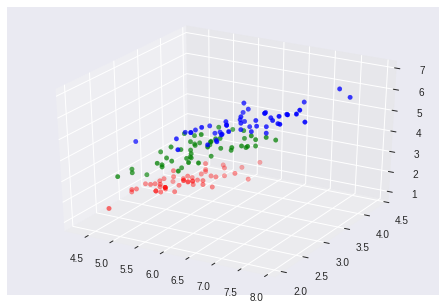

In [0]:
c1 = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3), max_rows = 50) 
c2 = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header = 50, max_rows = 50)
c3 = np.genfromtxt('iris.csv', delimiter=',', usecols=(0, 1, 2, 3),skip_header=100, max_rows = 50)
data = np.float32(np.concatenate((c1, c2, c3)))
 
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
#colors.extend(["yellow"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], data[:, 3], c=colors)
labels = range(150)

Executando a rede neural SOM

In [0]:
#escolha o tamanho da rede SOM
n_rows, n_columns = 100, 160
som = somoclu.Somoclu(n_columns, n_rows, data=data)
%time som.train()

CPU times: user 9.07 s, sys: 20.7 ms, total: 9.09 s
Wall time: 4.57 s


Visualizar o resultado:

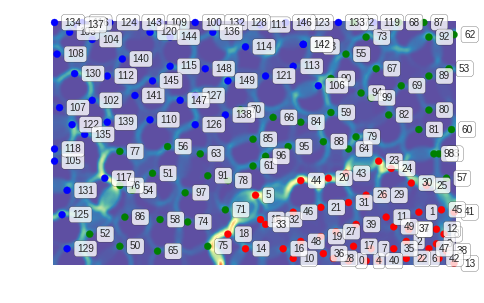

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

#Mini-Projeto 2:

Execute uma das Redes Neurais SOM acima com a base de dados MNist que possui caracteres de 0 a 9. Mostre os resultados abaixo:

1. Mostre 3 configurações de Mapa diferentes
2. Construa a matriz de confusão mostrando o resultado desses mapas (Se tem dúvidas, olhe a aula de Avaliação de resultados da disciplina anterior de Inteligência Artificial)
3. Calcule a taxa de acerto utilizando a matriz de confusão gerada no passo anterior.

DATA DE ENTREGA: 09/04/2019


